<a href="https://colab.research.google.com/github/vinayakShenoy/DL4CV/blob/master/Code/Overfitting_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definition
- Underfitting occurs when your model cannot obtain sufficiently low loss on the training set. Model fails to learn the underlying patterns in training data.
- Overfitting occurs when the network models the training too well and fails to generalize to validation data.
- The goal while training a ML model is to 
  - Reduce the training loss as much as possible
  - While ensuring the gap between the training and testing loss is reasonably small
- Controlling whether a model is likely to underfit/overfit can be accomplished by adjusting capacity of the neural network. 
- We can increase capacity by adding more layers and neurons to the network and decrease capacity by removing layers and neurons and applying regularization techniques(weight decay, dropout, data augmentation, early stopping, etc.)


# Creating a Training Monitor
- Create a TrainingMonitor callback that will be called at the end of every epoch when training a network with keras. 
- The monitor will serialize the loss accuracy for both the training and validation set to disk, followed by constructing a plot of the data.

# Checkpointing
- Serialize our network weights to disk each time model performance improves 

In [ ]:
!git clone https://github.com/vinayakShenoy/DL4CV
%cd DL4CV/Code
!pip install import_ipynb
!mkdir output

Cloning into 'DL4CV'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 41 (delta 8), reused 17 (delta 1), pack-reused 0
Unpacking objects: 100% (41/41), done.
/content/DL4CV/Code
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=ab29c89a7a44c30bc53a4a5b075b5f9afe80dbb2c9733691dd1c1400b048ec22
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
from tensorflow.keras.callbacks import  BaseLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import json
import os
import import_ipynb
from MiniVGGNet import MiniVGGNet

In [ ]:
class TrainingMonitor(BaseLogger):
  def __init__(self, figPath, jsonPath=None, startAt=0):
    super(TrainingMonitor, self).__init__()
    self.figPath = figPath
    self.jsonPath = jsonPath
    self.startAt = startAt
  
  def on_train_begin(self, logs={}):
    self.H = {}

    if self.jsonPath is not None:
      if os.path.exists(self.jsonPath):
        self.H = json.loads(open(self.jsonPath).read())

        if self.startAt > 0:
          for k in self.H.keys():
            self.H[k] = self.H[k][:self.startAt]

  def on_epoch_end(self, epoch, logs={}):
    for (k,v) in logs.items():
      l = self.H.get(k, [])
      l.append(float(v))
      self.H[k] = l

    if self.jsonPath is not None:
      f = open(self.jsonPath, "w")
      f.write(json.dumps(self.H))
      f.close()

    if len(self.H["loss"]) > 1:
      N = np.arange(0, len(self.H["loss"]))
      plt.style.use("ggplot")
      plt.figure()
      plt.plot(N, self.H["loss"], label="train_loss")
      plt.plot(N, self.H["val_loss"], label="val_loss")
      plt.plot(N, self.H["accuracy"], label="train_acc")
      plt.plot(N, self.H["val_accuracy"], label="val_acc")
      plt.title("Training Loss and Accuracy [Epoch {}]".format(
      len(self.H["loss"])))
      plt.xlabel("Epoch #")
      plt.ylabel("Loss/Accuracy")
      plt.legend()

In [ ]:
args = {
    "output": "output",
    "weights": "."
}
# show information on the process ID
print("[INFO process ID: {}".format(os.getpid()))

[INFO process ID: 121


In [ ]:
print("INFO loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer", 
              "dog", "frog", "horse", "ship", "truck"]

INFO loading CIFAR-10 data...
170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("[INFO] compiling model...")
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


INFO training network
Epoch 1/100
782/782 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9735
Epoch 00001: val_loss improved from inf to 0.67348, saving model to ./weights-001-0.6735.hdf5
782/782 [==============================] - 14s 18ms/step - loss: 0.0741 - accuracy: 0.9735 - val_loss: 0.6735 - val_accuracy: 0.8409
Epoch 2/100
779/782 [============================>.] - ETA: 0s - loss: 0.0739 - accuracy: 0.9743
Epoch 00002: val_loss did not improve from 0.67348
782/782 [==============================] - 13s 17ms/step - loss: 0.0738 - accuracy: 0.9743 - val_loss: 0.6808 - val_accuracy: 0.8396
Epoch 3/100
781/782 [============================>.] - ETA: 0s - loss: 0.0778 - accuracy: 0.9727
Epoch 00003: val_loss did not improve from 0.67348
782/782 [==============================] - 14s 18ms/step - loss: 0.0778 - accuracy: 0.9727 - val_loss: 0.7240 - val_accuracy: 0.8314
Epoch 4/100
780/782 [============================>.] - ETA: 0s - loss: 0.0768 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0691 - accuracy: 0.9754
Epoch 00022: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0691 - accuracy: 0.9754 - val_loss: 0.6811 - val_accuracy: 0.8392
Epoch 23/100
  9/782 [..............................] - ETA: 10s - loss: 0.0779 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9774
Epoch 00023: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0659 - accuracy: 0.9774 - val_loss: 0.6940 - val_accuracy: 0.8407
Epoch 24/100
  9/782 [..............................] - ETA: 10s - loss: 0.0680 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0625 - accuracy: 0.9780
Epoch 00024: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0625 - accuracy: 0.9780 - val_loss: 0.6704 - val_accuracy: 0.8391
Epoch 25/100
  9/782 [..............................] - ETA: 10s - loss: 0.0584 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9762
Epoch 00025: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0654 - accuracy: 0.9762 - val_loss: 0.6989 - val_accuracy: 0.8381
Epoch 26/100
  9/782 [..............................] - ETA: 10s - loss: 0.0528 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0655 - accuracy: 0.9775
Epoch 00026: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0655 - accuracy: 0.9775 - val_loss: 0.6962 - val_accuracy: 0.8394
Epoch 27/100
  9/782 [..............................] - ETA: 10s - loss: 0.0622 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0674 - accuracy: 0.9771
Epoch 00027: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0674 - accuracy: 0.9772 - val_loss: 0.7533 - val_accuracy: 0.8336
Epoch 28/100
  9/782 [..............................] - ETA: 11s - loss: 0.0739 - accuracy: 0.9774

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9761
Epoch 00028: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0677 - accuracy: 0.9761 - val_loss: 0.7280 - val_accuracy: 0.8325
Epoch 29/100
  8/782 [..............................] - ETA: 10s - loss: 0.0622 - accuracy: 0.9766

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0634 - accuracy: 0.9777
Epoch 00029: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0634 - accuracy: 0.9777 - val_loss: 0.7330 - val_accuracy: 0.8364
Epoch 30/100
  9/782 [..............................] - ETA: 10s - loss: 0.0674 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0637 - accuracy: 0.9781
Epoch 00030: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0637 - accuracy: 0.9781 - val_loss: 0.6907 - val_accuracy: 0.8433
Epoch 31/100
  9/782 [..............................] - ETA: 10s - loss: 0.0441 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9783
Epoch 00031: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0616 - accuracy: 0.9783 - val_loss: 0.7414 - val_accuracy: 0.8326
Epoch 32/100
  9/782 [..............................] - ETA: 11s - loss: 0.0581 - accuracy: 0.9722

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9792
Epoch 00032: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0599 - accuracy: 0.9793 - val_loss: 0.6838 - val_accuracy: 0.8409
Epoch 33/100
  8/782 [..............................] - ETA: 10s - loss: 0.0756 - accuracy: 0.9746

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0584 - accuracy: 0.9795
Epoch 00033: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0587 - accuracy: 0.9794 - val_loss: 0.7128 - val_accuracy: 0.8364
Epoch 34/100
  9/782 [..............................] - ETA: 10s - loss: 0.0380 - accuracy: 0.9878

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0606 - accuracy: 0.9795
Epoch 00034: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0607 - accuracy: 0.9795 - val_loss: 0.7170 - val_accuracy: 0.8371
Epoch 35/100
  9/782 [..............................] - ETA: 10s - loss: 0.0604 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9787
Epoch 00035: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0618 - accuracy: 0.9787 - val_loss: 0.7585 - val_accuracy: 0.8372
Epoch 36/100
  9/782 [..............................] - ETA: 11s - loss: 0.0482 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9787
Epoch 00036: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0616 - accuracy: 0.9787 - val_loss: 0.7022 - val_accuracy: 0.8398
Epoch 37/100
  9/782 [..............................] - ETA: 10s - loss: 0.0721 - accuracy: 0.9774

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0592 - accuracy: 0.9794
Epoch 00037: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0593 - accuracy: 0.9794 - val_loss: 0.7262 - val_accuracy: 0.8356
Epoch 38/100
  1/782 [..............................] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0607 - accuracy: 0.9788
Epoch 00038: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0607 - accuracy: 0.9788 - val_loss: 0.7091 - val_accuracy: 0.8367
Epoch 39/100
  9/782 [..............................] - ETA: 10s - loss: 0.0504 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0621 - accuracy: 0.9787
Epoch 00039: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0622 - accuracy: 0.9786 - val_loss: 0.7183 - val_accuracy: 0.8349
Epoch 40/100
  9/782 [..............................] - ETA: 10s - loss: 0.0474 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0626 - accuracy: 0.9789
Epoch 00040: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0626 - accuracy: 0.9789 - val_loss: 0.7260 - val_accuracy: 0.8381
Epoch 41/100
  9/782 [..............................] - ETA: 11s - loss: 0.0516 - accuracy: 0.9809

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0608 - accuracy: 0.9788
Epoch 00041: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0609 - accuracy: 0.9787 - val_loss: 0.7519 - val_accuracy: 0.8344
Epoch 42/100
  9/782 [..............................] - ETA: 11s - loss: 0.0730 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9785
Epoch 00042: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0610 - accuracy: 0.9785 - val_loss: 0.7268 - val_accuracy: 0.8412
Epoch 43/100
  8/782 [..............................] - ETA: 10s - loss: 0.0758 - accuracy: 0.9668

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0593 - accuracy: 0.9790
Epoch 00043: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0593 - accuracy: 0.9790 - val_loss: 0.7016 - val_accuracy: 0.8388
Epoch 44/100
  7/782 [..............................] - ETA: 11s - loss: 0.0534 - accuracy: 0.9777

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9789
Epoch 00044: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0593 - accuracy: 0.9789 - val_loss: 0.7209 - val_accuracy: 0.8397
Epoch 45/100
  8/782 [..............................] - ETA: 11s - loss: 0.0471 - accuracy: 0.9824

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0586 - accuracy: 0.9798
Epoch 00045: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0586 - accuracy: 0.9798 - val_loss: 0.7183 - val_accuracy: 0.8400
Epoch 46/100
  7/782 [..............................] - ETA: 11s - loss: 0.0975 - accuracy: 0.9732

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9798
Epoch 00046: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.6948 - val_accuracy: 0.8389
Epoch 47/100
  9/782 [..............................] - ETA: 10s - loss: 0.0367 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9792
Epoch 00047: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0611 - accuracy: 0.9792 - val_loss: 0.6949 - val_accuracy: 0.8437
Epoch 48/100
  9/782 [..............................] - ETA: 10s - loss: 0.0324 - accuracy: 0.9861

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9806
Epoch 00048: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0568 - accuracy: 0.9806 - val_loss: 0.7819 - val_accuracy: 0.8287
Epoch 49/100
  8/782 [..............................] - ETA: 10s - loss: 0.0712 - accuracy: 0.9727

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9810
Epoch 00049: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0547 - accuracy: 0.9810 - val_loss: 0.7130 - val_accuracy: 0.8419
Epoch 50/100
  9/782 [..............................] - ETA: 10s - loss: 0.0625 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0549 - accuracy: 0.9807
Epoch 00050: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0549 - accuracy: 0.9807 - val_loss: 0.7635 - val_accuracy: 0.8351
Epoch 51/100
  9/782 [..............................] - ETA: 10s - loss: 0.0645 - accuracy: 0.9722

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0562 - accuracy: 0.9808
Epoch 00051: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0562 - accuracy: 0.9808 - val_loss: 0.7005 - val_accuracy: 0.8434
Epoch 52/100
  9/782 [..............................] - ETA: 10s - loss: 0.0464 - accuracy: 0.9878

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0559 - accuracy: 0.9811
Epoch 00052: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0559 - accuracy: 0.9811 - val_loss: 0.7134 - val_accuracy: 0.8449
Epoch 53/100
  9/782 [..............................] - ETA: 10s - loss: 0.0398 - accuracy: 0.9878

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9805
Epoch 00053: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0560 - accuracy: 0.9805 - val_loss: 0.7326 - val_accuracy: 0.8411
Epoch 54/100
  9/782 [..............................] - ETA: 10s - loss: 0.0650 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0574 - accuracy: 0.9798
Epoch 00054: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0574 - accuracy: 0.9798 - val_loss: 0.7244 - val_accuracy: 0.8410
Epoch 55/100
  9/782 [..............................] - ETA: 10s - loss: 0.0591 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9801
Epoch 00055: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0565 - accuracy: 0.9800 - val_loss: 0.7295 - val_accuracy: 0.8432
Epoch 56/100
  9/782 [..............................] - ETA: 10s - loss: 0.0743 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0552 - accuracy: 0.9811
Epoch 00056: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0552 - accuracy: 0.9811 - val_loss: 0.6998 - val_accuracy: 0.8405
Epoch 57/100
  9/782 [..............................] - ETA: 10s - loss: 0.0585 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9805
Epoch 00057: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0571 - accuracy: 0.9805 - val_loss: 0.7135 - val_accuracy: 0.8436
Epoch 58/100
  8/782 [..............................] - ETA: 11s - loss: 0.0428 - accuracy: 0.9785

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9808
Epoch 00058: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0540 - accuracy: 0.9808 - val_loss: 0.7190 - val_accuracy: 0.8407
Epoch 59/100
  9/782 [..............................] - ETA: 10s - loss: 0.0371 - accuracy: 0.9861

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9801
Epoch 00059: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0573 - accuracy: 0.9801 - val_loss: 0.7242 - val_accuracy: 0.8405
Epoch 60/100
  7/782 [..............................] - ETA: 11s - loss: 0.0405 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9805
Epoch 00060: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0567 - accuracy: 0.9805 - val_loss: 0.6934 - val_accuracy: 0.8376
Epoch 61/100
  9/782 [..............................] - ETA: 10s - loss: 0.0479 - accuracy: 0.9809

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0546 - accuracy: 0.9806
Epoch 00061: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0545 - accuracy: 0.9806 - val_loss: 0.7234 - val_accuracy: 0.8438
Epoch 62/100
  9/782 [..............................] - ETA: 10s - loss: 0.0265 - accuracy: 0.9913

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0527 - accuracy: 0.9817
Epoch 00062: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0529 - accuracy: 0.9816 - val_loss: 0.7087 - val_accuracy: 0.8386
Epoch 63/100
  9/782 [..............................] - ETA: 11s - loss: 0.0609 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0542 - accuracy: 0.9812
Epoch 00063: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0543 - accuracy: 0.9811 - val_loss: 0.7847 - val_accuracy: 0.8356
Epoch 64/100
  8/782 [..............................] - ETA: 11s - loss: 0.0440 - accuracy: 0.9863

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9822
Epoch 00064: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0511 - accuracy: 0.9823 - val_loss: 0.7187 - val_accuracy: 0.8427
Epoch 65/100
  7/782 [..............................] - ETA: 11s - loss: 0.0383 - accuracy: 0.9888

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9814
Epoch 00065: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0528 - accuracy: 0.9814 - val_loss: 0.7394 - val_accuracy: 0.8379
Epoch 66/100
  9/782 [..............................] - ETA: 10s - loss: 0.0316 - accuracy: 0.9931

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9821
Epoch 00066: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0513 - accuracy: 0.9821 - val_loss: 0.7231 - val_accuracy: 0.8384
Epoch 67/100
  9/782 [..............................] - ETA: 11s - loss: 0.0662 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9819
Epoch 00067: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0527 - accuracy: 0.9818 - val_loss: 0.7274 - val_accuracy: 0.8396
Epoch 68/100
  9/782 [..............................] - ETA: 10s - loss: 0.0324 - accuracy: 0.9931

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0523 - accuracy: 0.9819
Epoch 00068: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0522 - accuracy: 0.9819 - val_loss: 0.7323 - val_accuracy: 0.8413
Epoch 69/100
  9/782 [..............................] - ETA: 10s - loss: 0.0644 - accuracy: 0.9740

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0555 - accuracy: 0.9810
Epoch 00069: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0555 - accuracy: 0.9810 - val_loss: 0.7353 - val_accuracy: 0.8391
Epoch 70/100
  8/782 [..............................] - ETA: 11s - loss: 0.0644 - accuracy: 0.9746

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9812
Epoch 00070: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0551 - accuracy: 0.9812 - val_loss: 0.7301 - val_accuracy: 0.8386
Epoch 71/100
  9/782 [..............................] - ETA: 10s - loss: 0.0428 - accuracy: 0.9896

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.9833
Epoch 00071: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0500 - accuracy: 0.9833 - val_loss: 0.8007 - val_accuracy: 0.8357
Epoch 72/100
  9/782 [..............................] - ETA: 10s - loss: 0.0465 - accuracy: 0.9861

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9823
Epoch 00072: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0515 - accuracy: 0.9822 - val_loss: 0.7253 - val_accuracy: 0.8395
Epoch 73/100
  9/782 [..............................] - ETA: 11s - loss: 0.0449 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9830
Epoch 00073: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0497 - accuracy: 0.9830 - val_loss: 0.7352 - val_accuracy: 0.8405
Epoch 74/100
  9/782 [..............................] - ETA: 11s - loss: 0.0316 - accuracy: 0.9896

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0503 - accuracy: 0.9818
Epoch 00074: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0503 - accuracy: 0.9818 - val_loss: 0.7381 - val_accuracy: 0.8402
Epoch 75/100
  9/782 [..............................] - ETA: 10s - loss: 0.0486 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9821
Epoch 00075: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0522 - accuracy: 0.9821 - val_loss: 0.7441 - val_accuracy: 0.8359
Epoch 76/100
  9/782 [..............................] - ETA: 10s - loss: 0.0770 - accuracy: 0.9722

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9822
Epoch 00076: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0505 - accuracy: 0.9822 - val_loss: 0.7141 - val_accuracy: 0.8426
Epoch 77/100
  8/782 [..............................] - ETA: 11s - loss: 0.0388 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0486 - accuracy: 0.9833
Epoch 00077: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0486 - accuracy: 0.9833 - val_loss: 0.7325 - val_accuracy: 0.8419
Epoch 78/100
  9/782 [..............................] - ETA: 10s - loss: 0.0639 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9823
Epoch 00078: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0508 - accuracy: 0.9823 - val_loss: 0.7474 - val_accuracy: 0.8383
Epoch 79/100
  9/782 [..............................] - ETA: 10s - loss: 0.0501 - accuracy: 0.9774

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9814
Epoch 00079: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0530 - accuracy: 0.9814 - val_loss: 0.7042 - val_accuracy: 0.8439
Epoch 80/100
  9/782 [..............................] - ETA: 10s - loss: 0.0288 - accuracy: 0.9896

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9836
Epoch 00080: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0476 - accuracy: 0.9835 - val_loss: 0.7432 - val_accuracy: 0.8416
Epoch 81/100
  7/782 [..............................] - ETA: 11s - loss: 0.0399 - accuracy: 0.9911

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0484 - accuracy: 0.9836

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



Epoch 00081: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0487 - accuracy: 0.9836 - val_loss: 0.7404 - val_accuracy: 0.8414
Epoch 82/100
780/782 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9811
Epoch 00082: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0525 - accuracy: 0.9811 - val_loss: 0.7350 - val_accuracy: 0.8403
Epoch 83/100
  9/782 [..............................] - ETA: 10s - loss: 0.0508 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0521 - accuracy: 0.9818
Epoch 00083: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 18ms/step - loss: 0.0522 - accuracy: 0.9818 - val_loss: 0.7180 - val_accuracy: 0.8425
Epoch 84/100
  9/782 [..............................] - ETA: 10s - loss: 0.0613 - accuracy: 0.9774

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0517 - accuracy: 0.9824
Epoch 00084: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0516 - accuracy: 0.9825 - val_loss: 0.7621 - val_accuracy: 0.8401
Epoch 85/100
  9/782 [..............................] - ETA: 10s - loss: 0.0358 - accuracy: 0.9878

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9819
Epoch 00085: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0505 - accuracy: 0.9819 - val_loss: 0.7245 - val_accuracy: 0.8383
Epoch 86/100
  8/782 [..............................] - ETA: 11s - loss: 0.0705 - accuracy: 0.9766

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0477 - accuracy: 0.9831
Epoch 00086: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0478 - accuracy: 0.9830 - val_loss: 0.7635 - val_accuracy: 0.8407
Epoch 87/100
  8/782 [..............................] - ETA: 11s - loss: 0.0546 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9829
Epoch 00087: val_loss did not improve from 0.66151
782/782 [==============================] - 14s 17ms/step - loss: 0.0480 - accuracy: 0.9829 - val_loss: 0.7247 - val_accuracy: 0.8404
Epoch 88/100
  9/782 [..............................] - ETA: 10s - loss: 0.0479 - accuracy: 0.9844

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0511 - accuracy: 0.9830
Epoch 00088: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0512 - accuracy: 0.9829 - val_loss: 0.7018 - val_accuracy: 0.8419
Epoch 89/100
  8/782 [..............................] - ETA: 10s - loss: 0.0546 - accuracy: 0.9785

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0502 - accuracy: 0.9828
Epoch 00089: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0502 - accuracy: 0.9827 - val_loss: 0.7333 - val_accuracy: 0.8406
Epoch 90/100
  9/782 [..............................] - ETA: 10s - loss: 0.0748 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9826
Epoch 00090: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0500 - accuracy: 0.9825 - val_loss: 0.7624 - val_accuracy: 0.8363
Epoch 91/100
  9/782 [..............................] - ETA: 10s - loss: 0.0671 - accuracy: 0.9757

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9828
Epoch 00091: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0482 - accuracy: 0.9828 - val_loss: 0.7973 - val_accuracy: 0.8396
Epoch 92/100
  8/782 [..............................] - ETA: 11s - loss: 0.0532 - accuracy: 0.9863

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0496 - accuracy: 0.9829
Epoch 00092: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0497 - accuracy: 0.9829 - val_loss: 0.7424 - val_accuracy: 0.8379
Epoch 93/100
  9/782 [..............................] - ETA: 10s - loss: 0.0734 - accuracy: 0.9688

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9824
Epoch 00093: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0493 - accuracy: 0.9824 - val_loss: 0.7720 - val_accuracy: 0.8304
Epoch 94/100
  9/782 [..............................] - ETA: 10s - loss: 0.0572 - accuracy: 0.9861

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0559 - accuracy: 0.9812
Epoch 00094: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0558 - accuracy: 0.9813 - val_loss: 0.7486 - val_accuracy: 0.8391
Epoch 95/100
  9/782 [..............................] - ETA: 10s - loss: 0.0510 - accuracy: 0.9792

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9828
Epoch 00095: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0486 - accuracy: 0.9828 - val_loss: 0.7391 - val_accuracy: 0.8367
Epoch 96/100
  9/782 [..............................] - ETA: 10s - loss: 0.0356 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


779/782 [============================>.] - ETA: 0s - loss: 0.0486 - accuracy: 0.9836
Epoch 00096: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0485 - accuracy: 0.9836 - val_loss: 0.7633 - val_accuracy: 0.8387
Epoch 97/100
  9/782 [..............................] - ETA: 10s - loss: 0.0468 - accuracy: 0.9826

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


780/782 [============================>.] - ETA: 0s - loss: 0.0501 - accuracy: 0.9832
Epoch 00097: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0500 - accuracy: 0.9832 - val_loss: 0.7397 - val_accuracy: 0.8400
Epoch 98/100
  8/782 [..............................] - ETA: 11s - loss: 0.0458 - accuracy: 0.9902

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9839
Epoch 00098: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0465 - accuracy: 0.9839 - val_loss: 0.7414 - val_accuracy: 0.8420
Epoch 99/100
  9/782 [..............................] - ETA: 10s - loss: 0.0745 - accuracy: 0.9740

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


782/782 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9845
Epoch 00099: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0467 - accuracy: 0.9845 - val_loss: 0.7268 - val_accuracy: 0.8431
Epoch 100/100
  9/782 [..............................] - ETA: 10s - loss: 0.0274 - accuracy: 0.9931

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


781/782 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9835
Epoch 00100: val_loss did not improve from 0.66151
782/782 [==============================] - 13s 17ms/step - loss: 0.0477 - accuracy: 0.9834 - val_loss: 0.7260 - val_accuracy: 0.8452


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


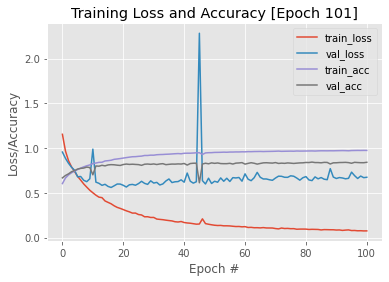

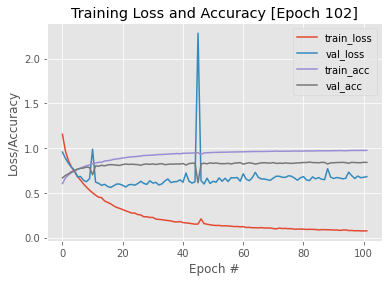

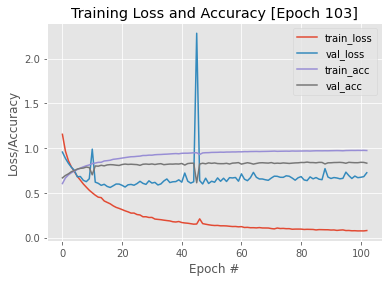

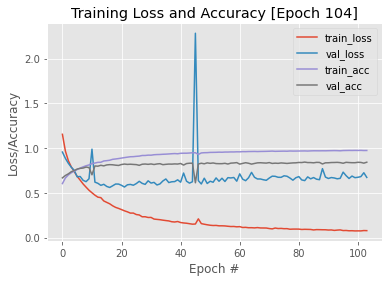

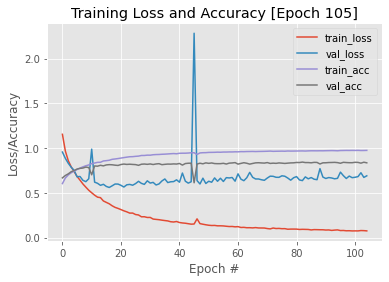

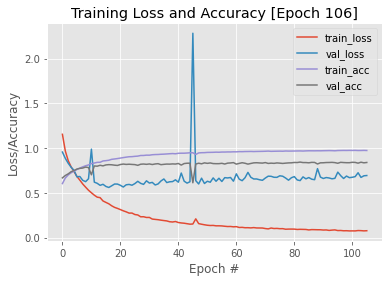

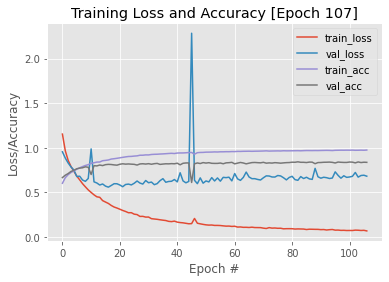

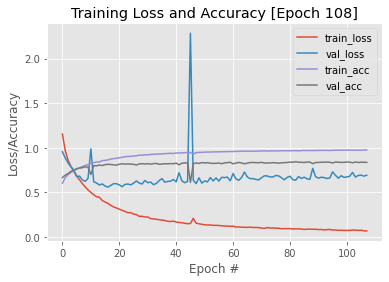

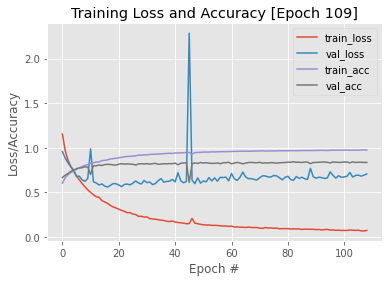

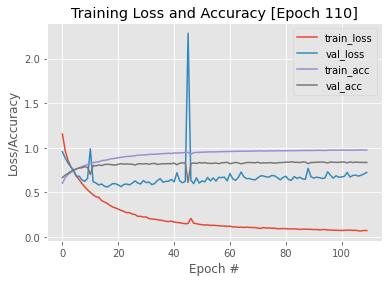

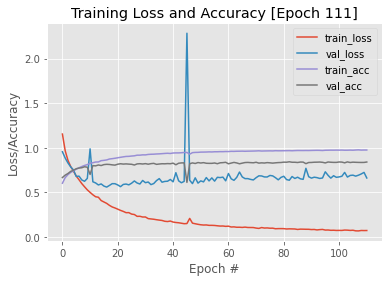

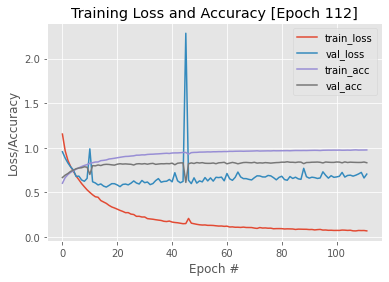

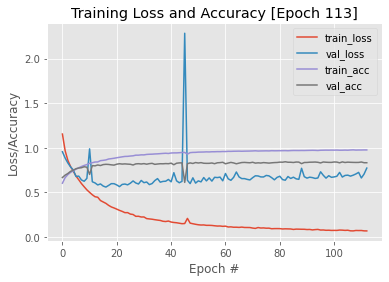

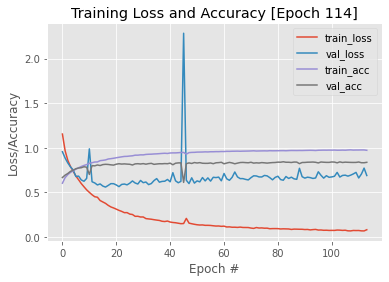

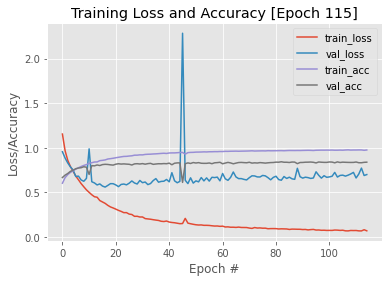

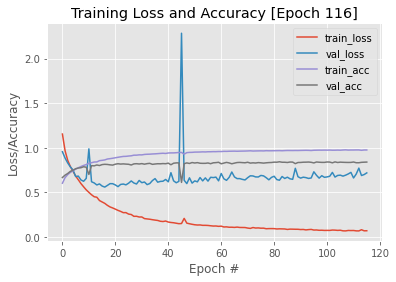

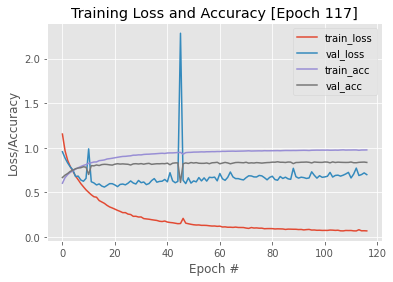

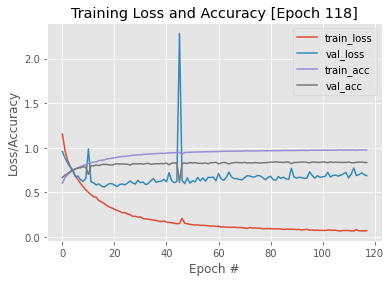

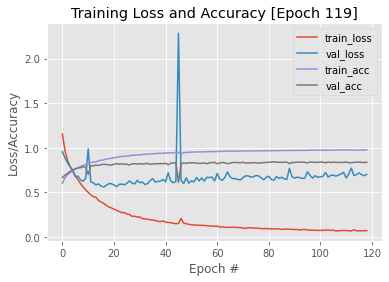

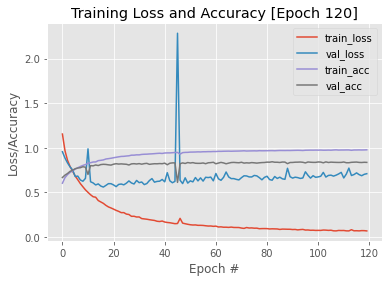

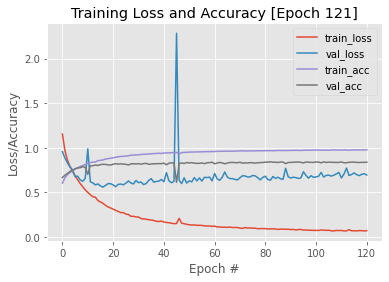

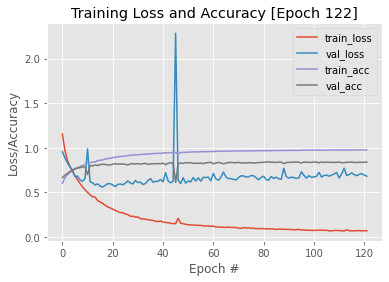

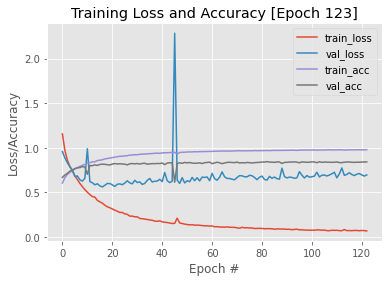

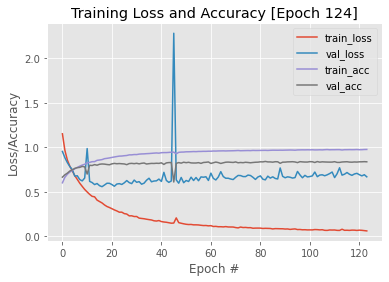

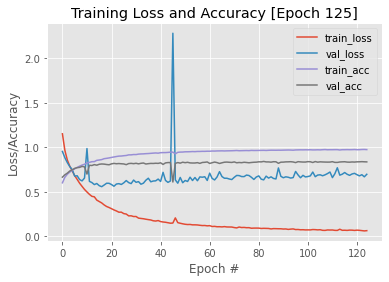

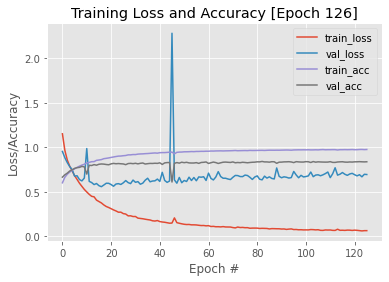

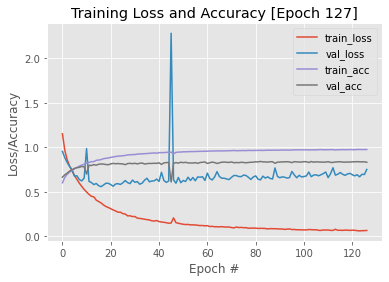

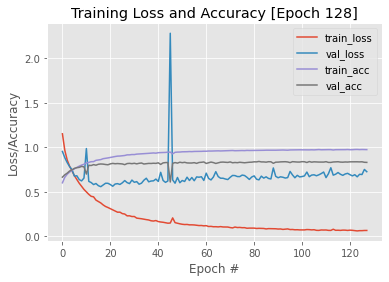

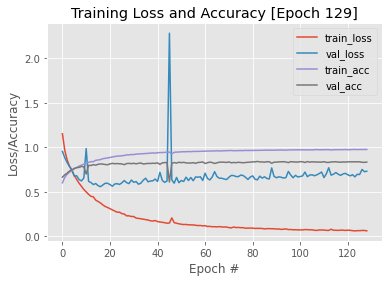

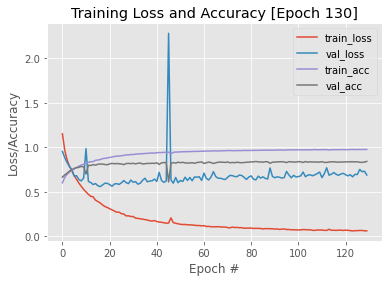

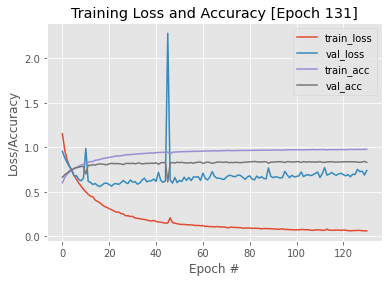

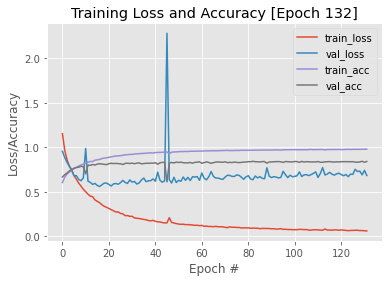

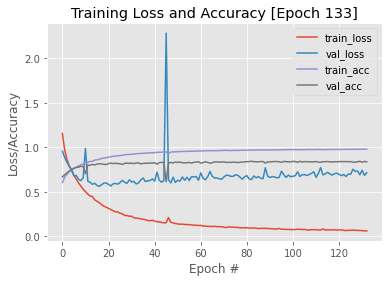

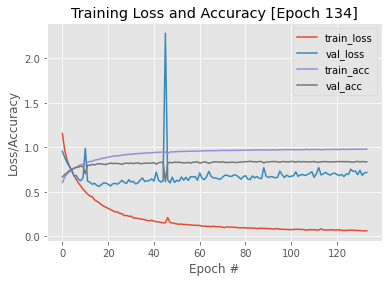

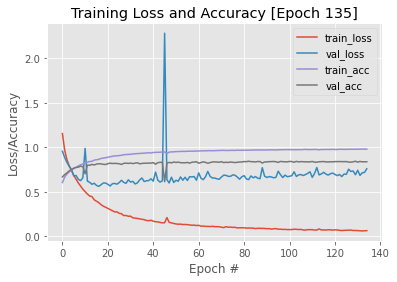

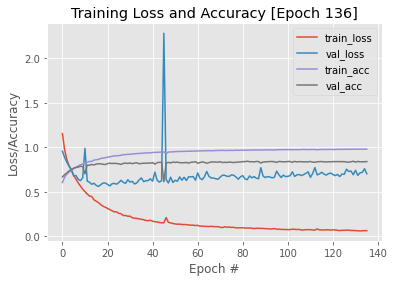

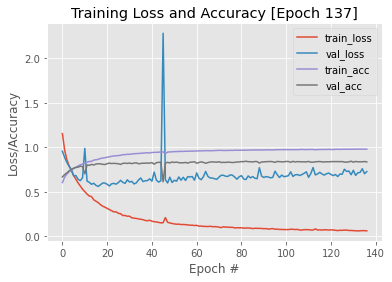

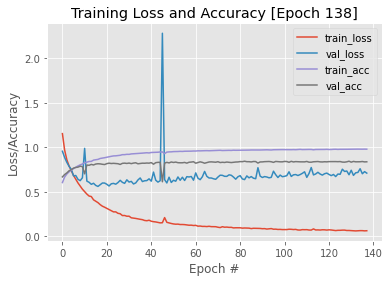

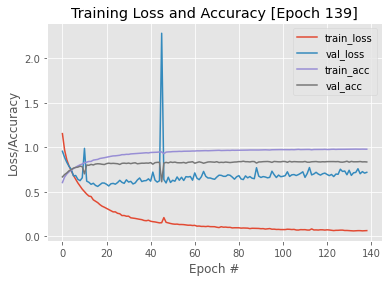

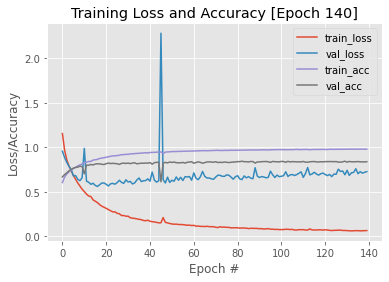

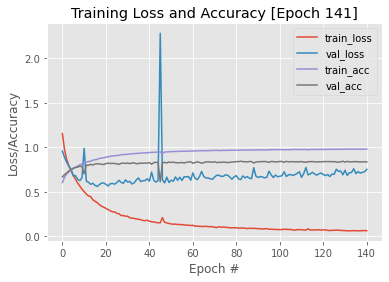

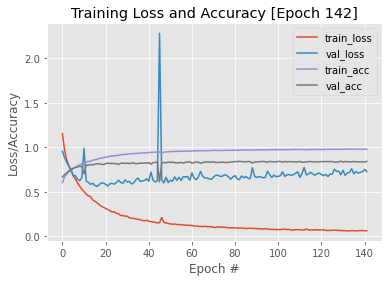

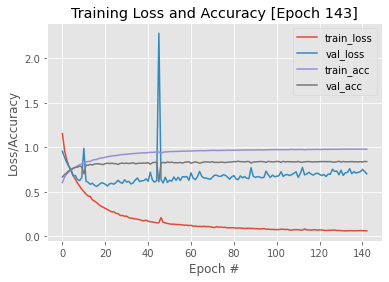

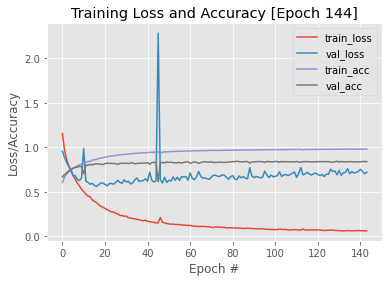

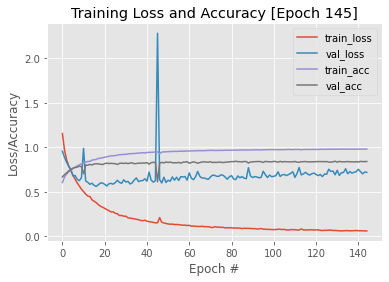

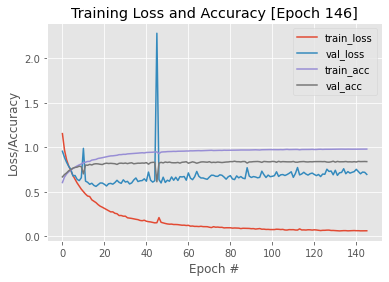

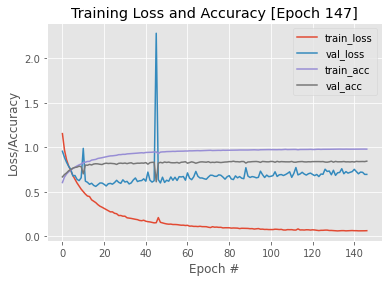

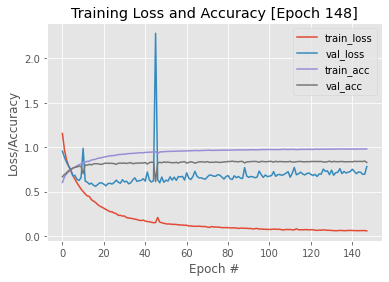

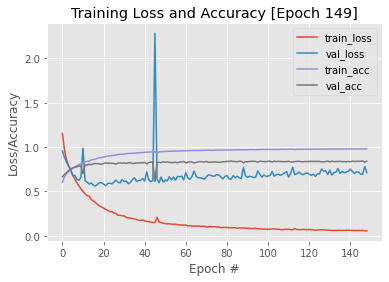

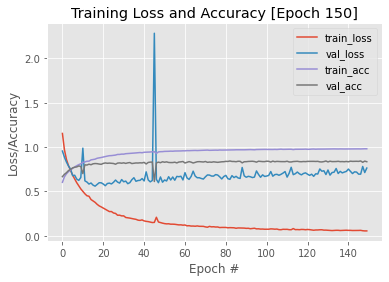

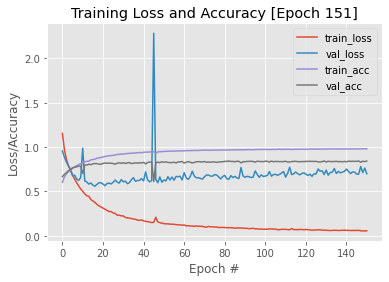

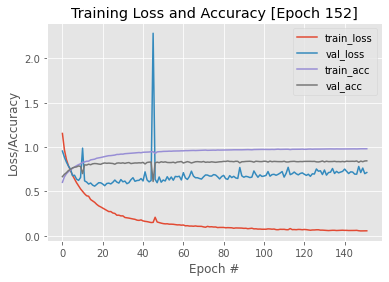

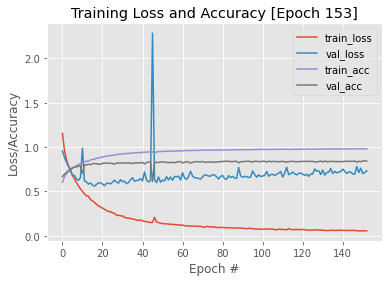

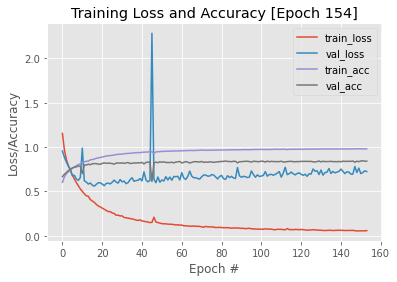

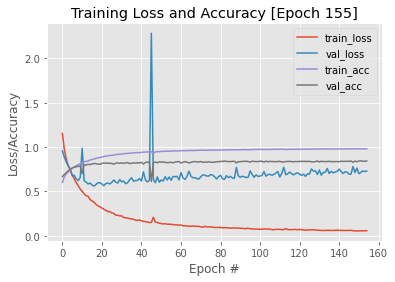

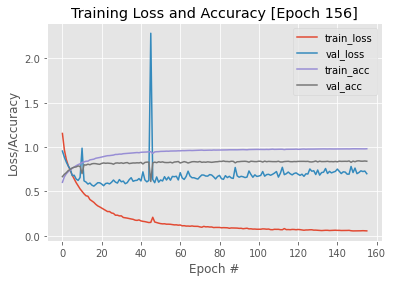

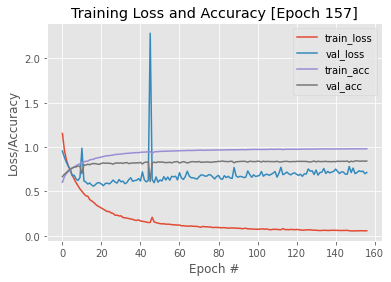

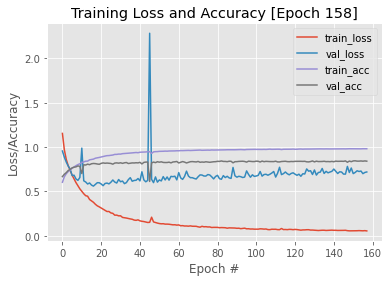

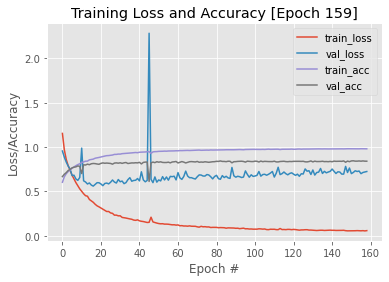

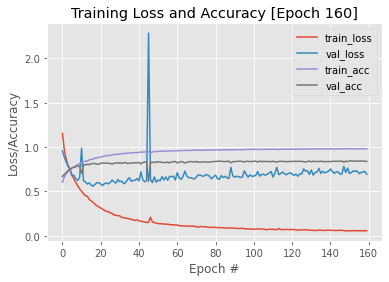

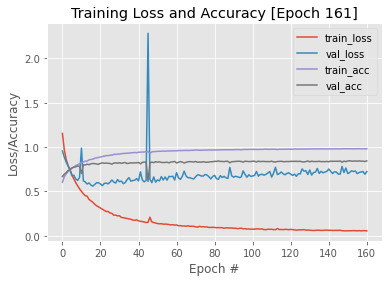

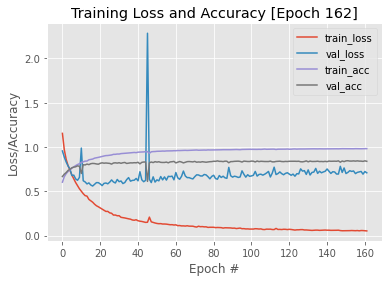

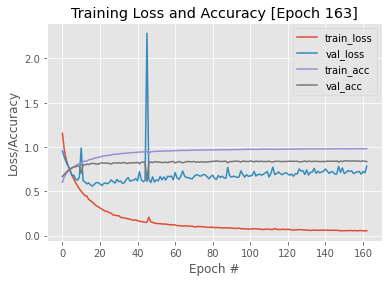

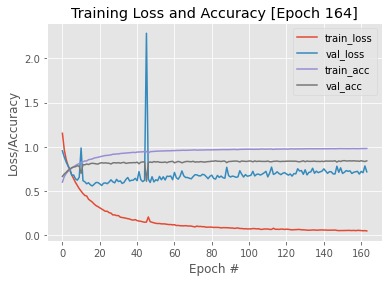

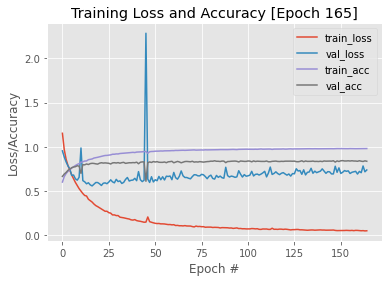

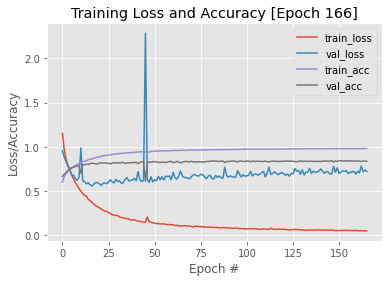

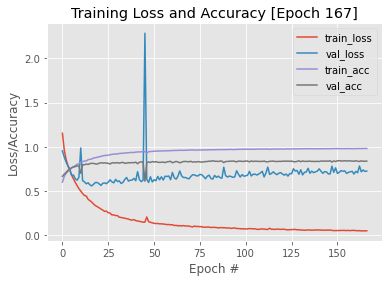

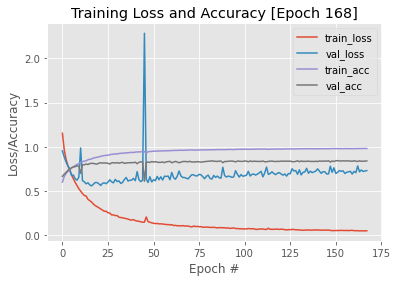

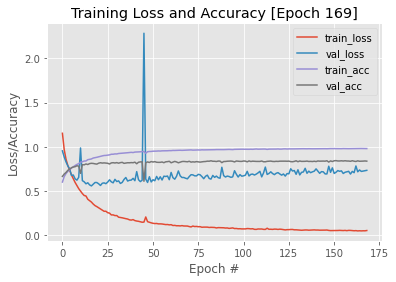

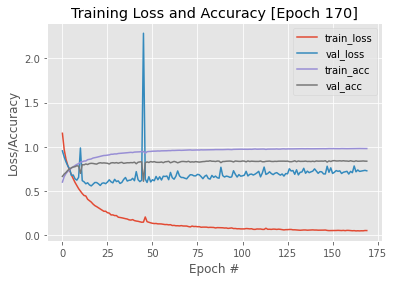

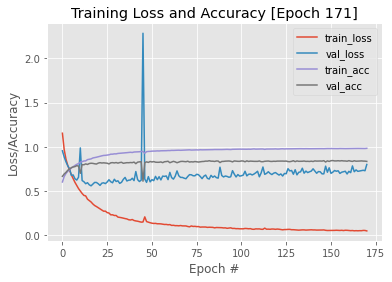

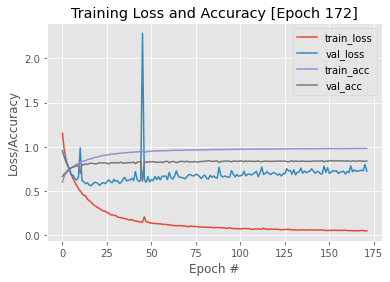

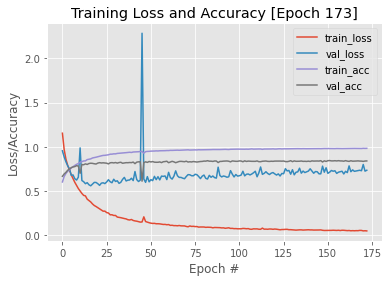

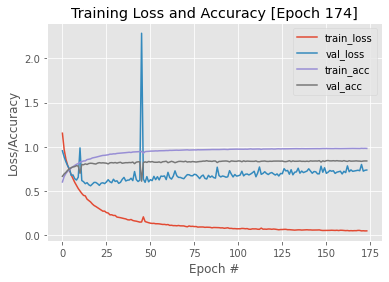

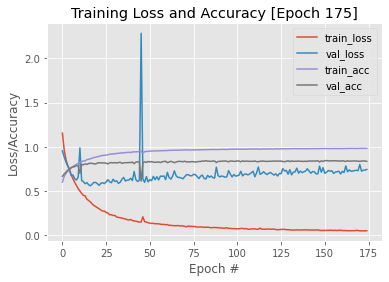

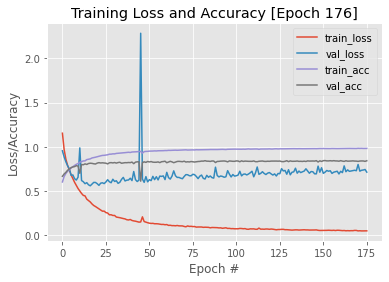

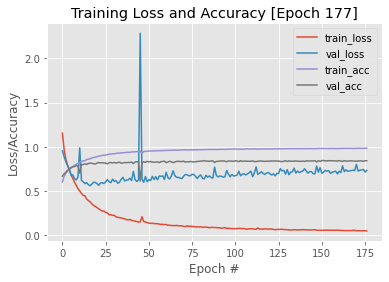

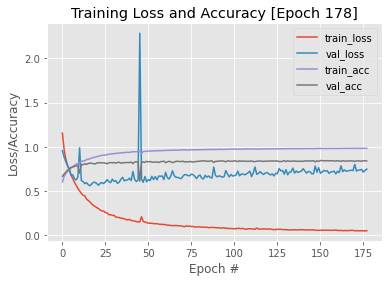

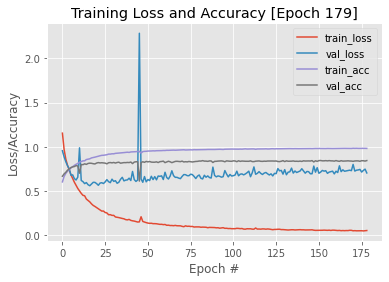

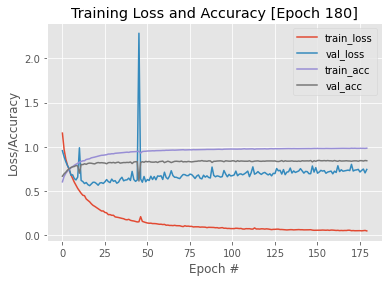

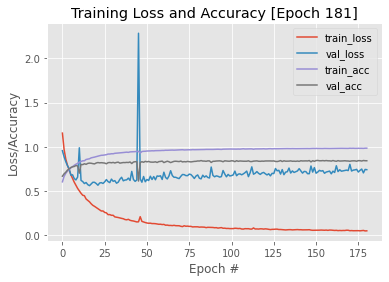

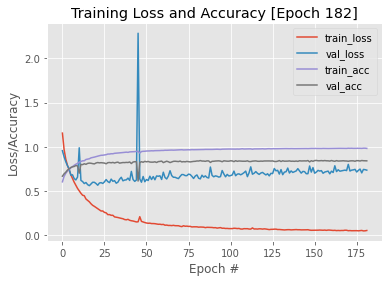

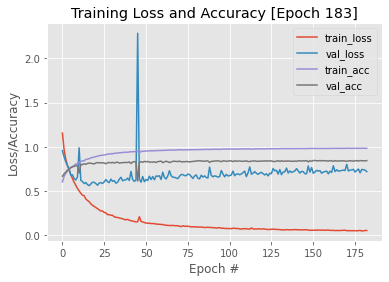

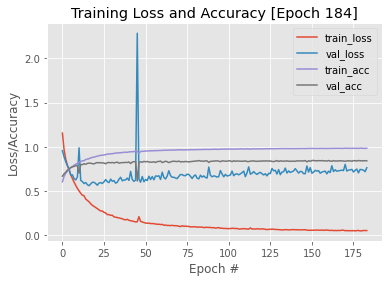

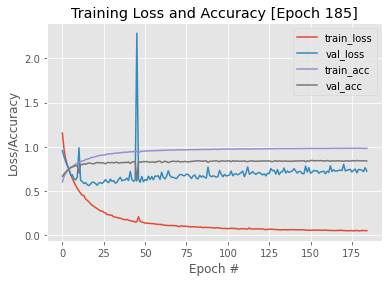

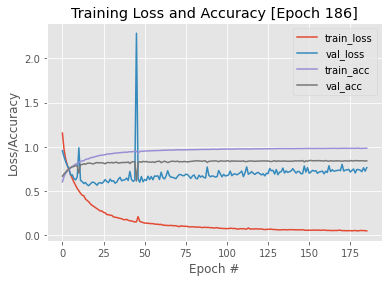

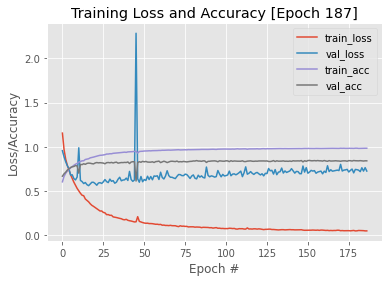

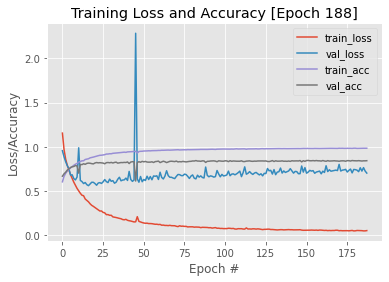

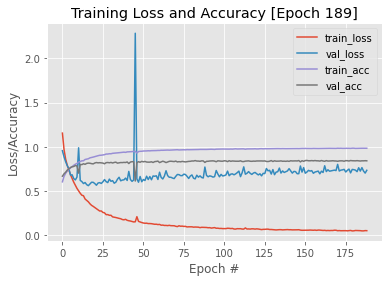

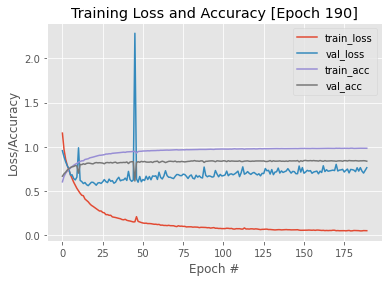

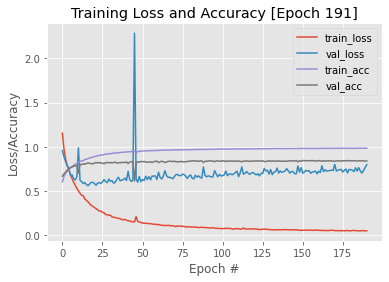

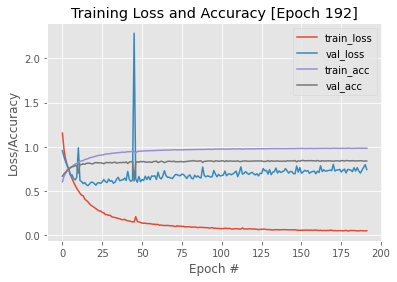

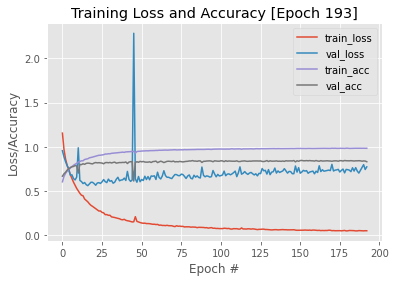

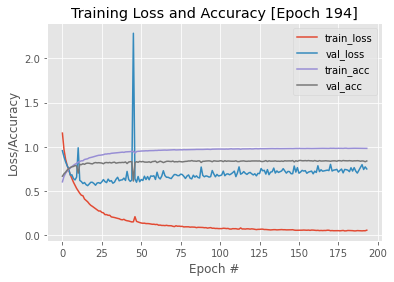

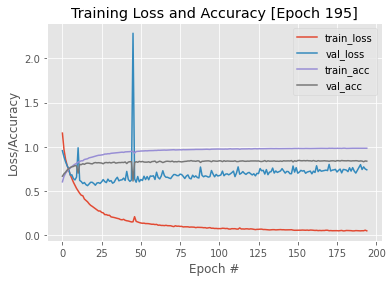

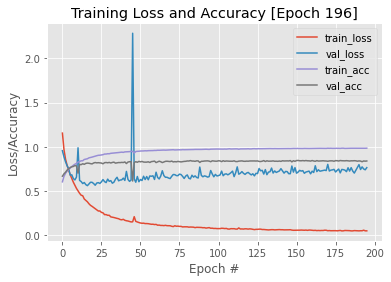

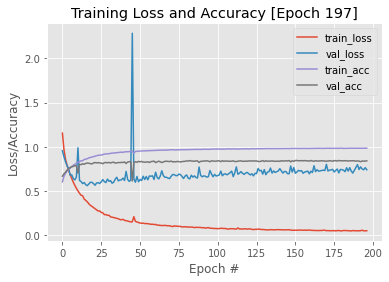

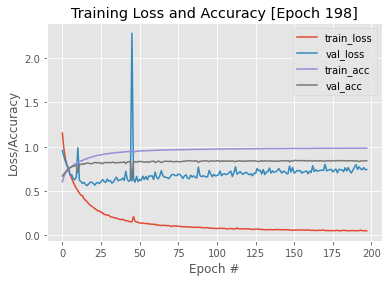

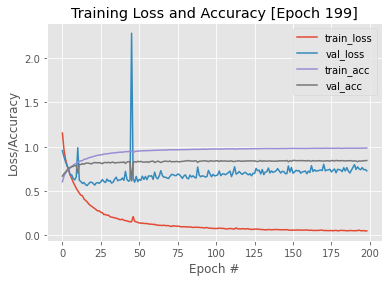

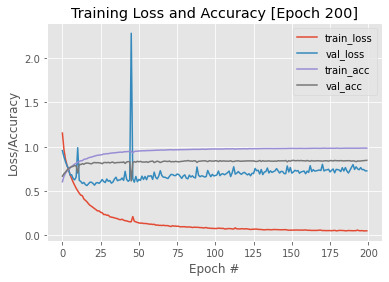

In [ ]:
figPath = os.path.sep.join([args["output"], "{}.png".format(os.getpid())])
jsonPath = os.path.sep.join([args["output"], "{}.json".format(os.getpid())])

fname = os.path.sep.join([args["weights"], "weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
checkpoint = ModelCheckpoint(fname, monitor="val_loss", mode="min", save_best_only=True,
                             verbose=1)
                          
callbacks = [TrainingMonitor(figPath, jsonPath=jsonPath), checkpoint]


print("INFO training network")
model.fit(trainX, trainY, validation_data=(testX, testY),
          batch_size=64, epochs=100, callbacks=callbacks, verbose=1)